# **Problem statement:**
To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution that can evaluate images and alert dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

In [3]:
#Importing necessary libraries
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [4]:
#mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/")
data_dir_test = pathlib.Path("/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test/")

In [6]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


**Defining parameters of the dataset**

In [7]:
batch_size = 32
img_height = 180
img_width = 180

In [8]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, validation_split=0.2, subset='training', seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [9]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, validation_split=0.2, subset='validation', seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [10]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### **Data Visualization**

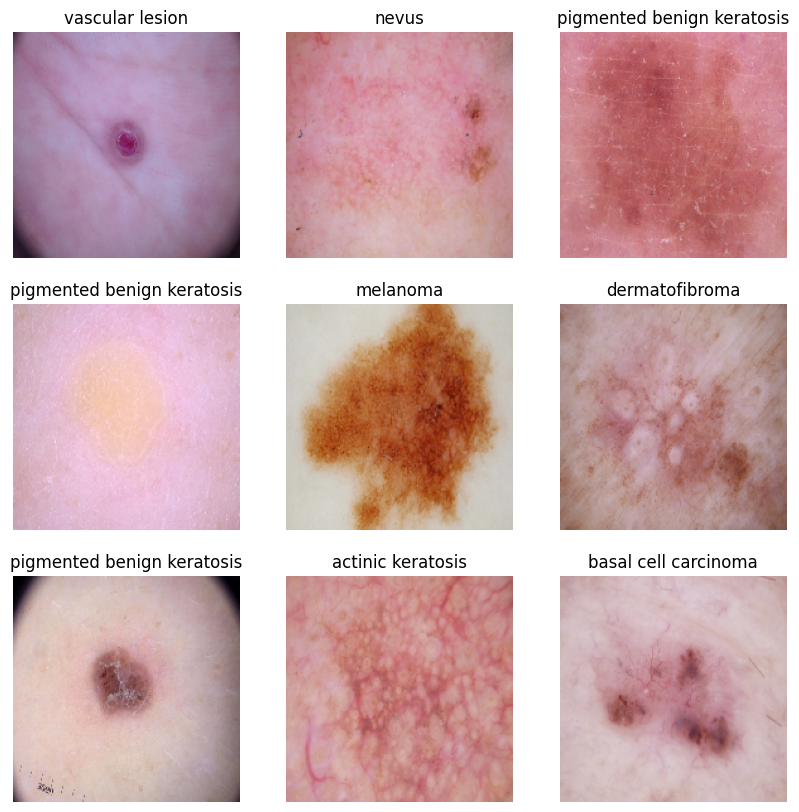

In [11]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [13]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

### **Model Creation**

In [14]:
#Building the CNN model
model=Sequential()
model.add(tf.keras.layers.experimental.preprocessing.Rescaling
 (1./255, input_shape=(180, 180, 3)))


model.add(layers.Conv2D(filters=32,kernel_size=(5,5),padding='Same',
                        activation='relu', input_shape=(180, 180, 32)))
model.add(layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Conv2D(filters=64,kernel_size=(5,5),padding='Same',
                        activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Conv2D(filters=64,kernel_size=(5,5),padding='Same',
                        activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer
model.add(layers.Dropout(0.25))

#Flatten layer
model.add(layers.Flatten())

#Softmax activation
model.add(layers.Dense(9, activation = "softmax"))

### **Compiling the model**

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.
              SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                   

### **Model training**

In [18]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
56/56 [==============================] - 81s 1s/step - loss: 2.0762 - accuracy: 0.1669 - val_loss: 2.0339 - val_accuracy: 0.2036
Epoch 2/30
56/56 [==============================] - 5s 92ms/step - loss: 2.0251 - accuracy: 0.2199 - val_loss: 1.9726 - val_accuracy: 0.2707
Epoch 3/30
56/56 [==============================] - 5s 91ms/step - loss: 1.9993 - accuracy: 0.2266 - val_loss: 1.9528 - val_accuracy: 0.2461
Epoch 4/30
56/56 [==============================] - 5s 93ms/step - loss: 1.9483 - accuracy: 0.2366 - val_loss: 1.8695 - val_accuracy: 0.3043
Epoch 5/30
56/56 [==============================] - 5s 91ms/step - loss: 1.8554 - accuracy: 0.2868 - val_loss: 1.8082 - val_accuracy: 0.3065
Epoch 6/30
56/56 [==============================] - 5s 92ms/step - loss: 1.8962 - accuracy: 0.2941 - val_loss: 1.9228 - val_accuracy: 0.2371
Epoch 7/30
56/56 [==============================] - 5s 92ms/step - loss: 1.7916 - accuracy: 0.3426 - val_loss: 1.7415 - val_accuracy: 0.3490
Epoch 8/30
56/

### **Visualizing training results**

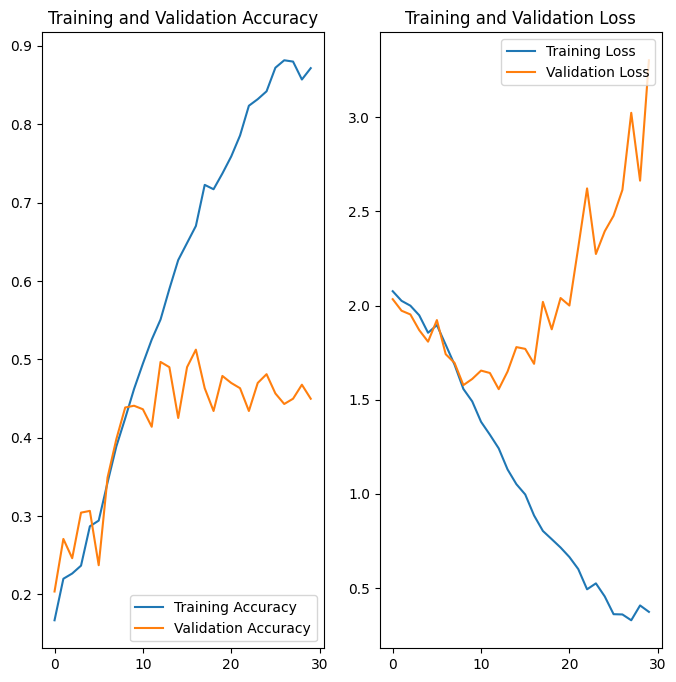

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### **Findings**

1.   There is a lot of difference between test and training accuracy and this shows that the model might be overfitting
2.   The accuracy is also quite less

In [20]:
data_augument = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip
                              (mode="horizontal_and_vertical",input_shape=
                               (img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation
                              (0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom
                              (height_factor=(0.2, 0.3), width_factor=(0.2, 0.3)
                              , fill_mode='reflect')
])

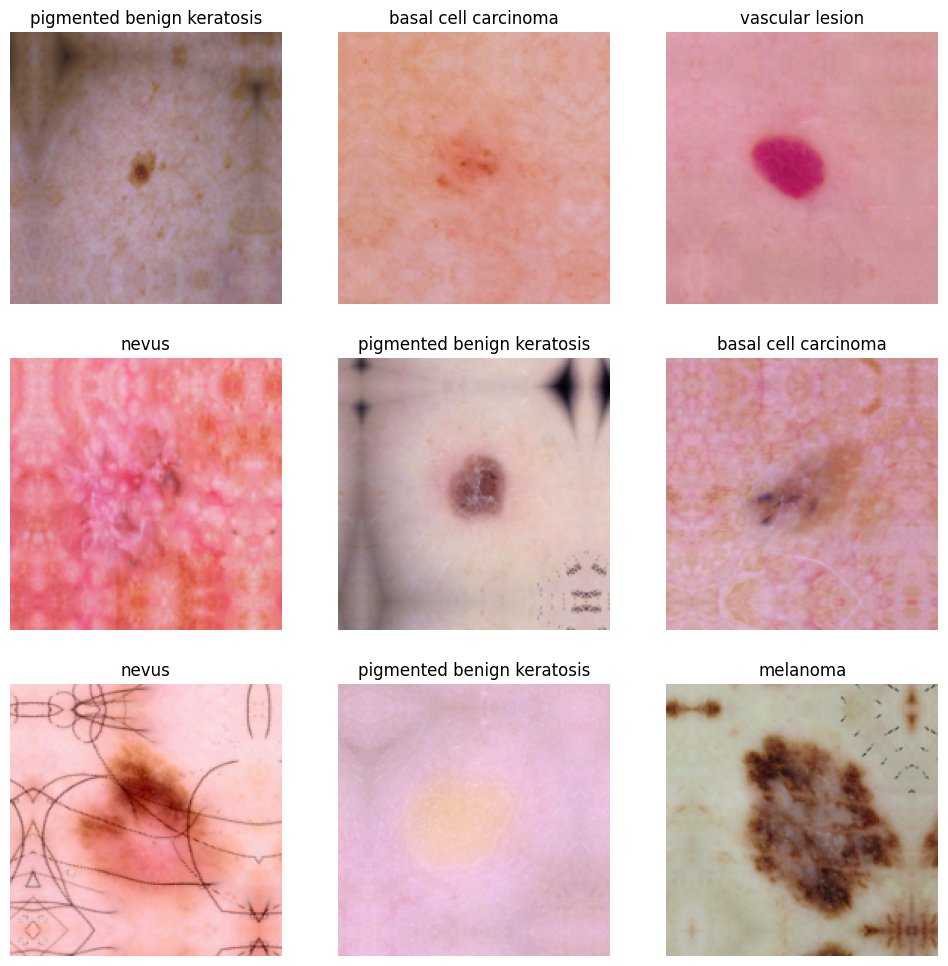

In [21]:
plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augument(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [22]:
#Building the CNN model
model = Sequential([data_augument,layers.experimental.preprocessing.Rescaling
 (1./255, input_shape=(180, 180,3))
])

model.add(layers.Conv2D(filters=32,kernel_size=(5,5),padding='Same',
                        activation='relu', input_shape=(180, 180, 32)))
model.add(layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Conv2D(filters=64,kernel_size=(5,5),padding='Same',
                        activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Conv2D(filters=64,kernel_size=(5,5),padding='Same',
                        activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer
model.add(layers.Dropout(0.25))

#Flatten layer
model.add(layers.Flatten())

#Dense layer
# model.add(layers.Dense(128,activation='relu'))

# model.add(layers.Dropout(0.25))

# #Softmax activation function
# model.add(layers.Dense(len(class_names),activation='softmax'))
model.add(layers.Dense(9, activation = "softmax"))

In [23]:
#Compiling
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy
               (from_logits=True),
              metrics=['accuracy'])

In [24]:
#Training
epochs=30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
56/56 [==============================] - 8s 100ms/step - loss: 2.0507 - accuracy: 0.1981 - val_loss: 2.0482 - val_accuracy: 0.1924
Epoch 2/30
56/56 [==============================] - 5s 96ms/step - loss: 2.0078 - accuracy: 0.2132 - val_loss: 1.9268 - val_accuracy: 0.1924
Epoch 3/30
56/56 [==============================] - 5s 94ms/step - loss: 2.0024 - accuracy: 0.2215 - val_loss: 1.9795 - val_accuracy: 0.2483
Epoch 4/30
56/56 [==============================] - 5s 94ms/step - loss: 1.9310 - accuracy: 0.2706 - val_loss: 1.9168 - val_accuracy: 0.3177
Epoch 5/30
56/56 [==============================] - 5s 96ms/step - loss: 1.8916 - accuracy: 0.2941 - val_loss: 1.8155 - val_accuracy: 0.3400
Epoch 6/30
56/56 [==============================] - 5s 94ms/step - loss: 1.7086 - accuracy: 0.3700 - val_loss: 1.7288 - val_accuracy: 0.3870
Epoch 7/30
56/56 [==============================] - 5s 93ms/step - loss: 1.7239 - accuracy: 0.3683 - val_loss: 1.6227 - val_accuracy: 0.4228
Epoch 8/30
5

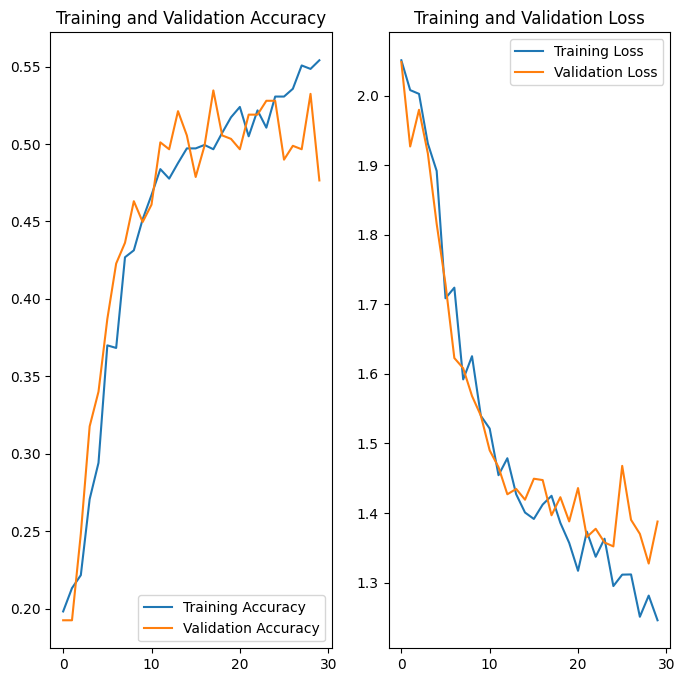

In [25]:
#Visualizing
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1) The overfitting problem has been sorted out as both the training and validation accuracy values are closer
2) But, the accuracy is still very less

In [26]:
path_list=[]
lesion_list=[]
for i in class_names:

    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/gdrive/MyDrive/Skin cancer ISIC The I...,actinic keratosis
1,/content/gdrive/MyDrive/Skin cancer ISIC The I...,actinic keratosis
2,/content/gdrive/MyDrive/Skin cancer ISIC The I...,actinic keratosis
3,/content/gdrive/MyDrive/Skin cancer ISIC The I...,actinic keratosis
4,/content/gdrive/MyDrive/Skin cancer ISIC The I...,actinic keratosis
...,...,...
2234,/content/gdrive/MyDrive/Skin cancer ISIC The I...,vascular lesion
2235,/content/gdrive/MyDrive/Skin cancer ISIC The I...,vascular lesion
2236,/content/gdrive/MyDrive/Skin cancer ISIC The I...,vascular lesion
2237,/content/gdrive/MyDrive/Skin cancer ISIC The I...,vascular lesion


In [27]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/gdrive/MyDrive/Skin cancer ISIC The I...,actinic keratosis
1,/content/gdrive/MyDrive/Skin cancer ISIC The I...,actinic keratosis
2,/content/gdrive/MyDrive/Skin cancer ISIC The I...,actinic keratosis
3,/content/gdrive/MyDrive/Skin cancer ISIC The I...,actinic keratosis
4,/content/gdrive/MyDrive/Skin cancer ISIC The I...,actinic keratosis
...,...,...
2234,/content/gdrive/MyDrive/Skin cancer ISIC The I...,vascular lesion
2235,/content/gdrive/MyDrive/Skin cancer ISIC The I...,vascular lesion
2236,/content/gdrive/MyDrive/Skin cancer ISIC The I...,vascular lesion
2237,/content/gdrive/MyDrive/Skin cancer ISIC The I...,vascular lesion


<BarContainer object of 9 artists>

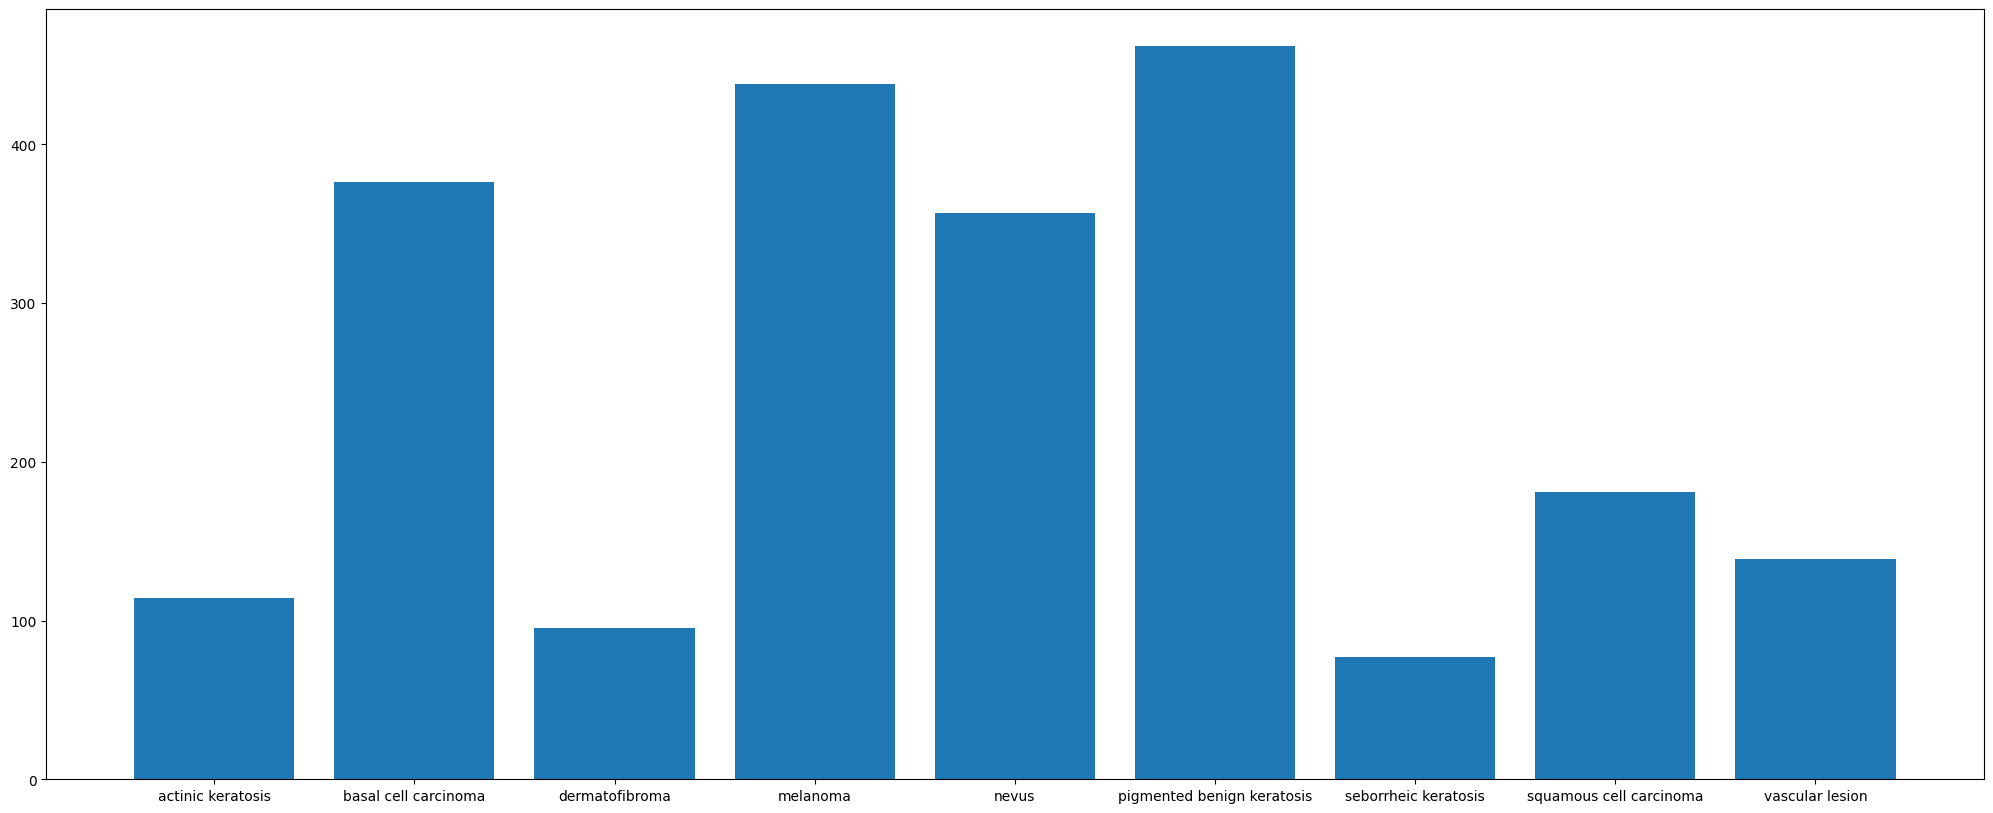

In [28]:
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

In [29]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [30]:
!pip install Augmentor

In [31]:
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline("/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/",save_format='jpg')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FAA902CD210>: 100%|██████████| 500/500 [00:47<00:00, 10.50 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FAA1C48FDF0>: 100%|██████████| 500/500 [00:43<00:00, 11.52 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FAA1C52F850>: 100%|██████████| 500/500 [00:39<00:00, 12.66 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FAA1C327F70>: 100%|██████████| 500/500 [00:35<00:00, 14.26 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FAA1C67BB80>: 100%|██████████| 500/500 [00:36<00:00, 13.68 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FAA1C627340>: 100%|██████████| 500/500 [00:39<00:00, 12.65 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FAA1C2D6E60>: 100%|██████████| 500/500 [00:48<00:00, 10.41 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FAAAB47DDB0>: 100%|██████████| 500/500 [00:46<00:00, 10.72 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FAA1C700EE0>: 100%|██████████| 500/500 [00:49<00:00, 10.03 Samples/s]


In [34]:
data_dir_train1 = pathlib.Path("/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output")
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)

4500


In [50]:
for i in class_names:
     for j in data_dir_train1.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
new_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
new_df

,Path,Label
0,/content/gdrive/MyDrive/Skin cancer ISIC The I...,actinic keratosis
1,/content/gdrive/MyDrive/Skin cancer ISIC The I...,actinic keratosis
2,/content/gdrive/MyDrive/Skin cancer ISIC The I...,actinic keratosis
3,/content/gdrive/MyDrive/Skin cancer ISIC The I...,actinic keratosis
4,/content/gdrive/MyDrive/Skin cancer ISIC The I...,actinic keratosis
...,...,...
6734,/content/gdrive/MyDrive/Skin cancer ISIC The I...,vascular lesion
6735,/content/gdrive/MyDrive/Skin cancer ISIC The I...,vascular lesion
6736,/content/gdrive/MyDrive/Skin cancer ISIC The I...,vascular lesion
6737,/content/gdrive/MyDrive/Skin cancer ISIC The I...,vascular lesion


In [51]:
new_df['Label'].value_counts()

Label
melanoma                      1365
pigmented benign keratosis    1362
nevus                         1107
basal cell carcinoma          1088
squamous cell carcinoma        544
vascular lesion                425
actinic keratosis              348
dermatofibroma                 275
seborrheic keratosis           225
Name: count, dtype: int64

### **Training model using augmentor**

In [52]:
batch_size = 32
img_height = 180
img_width = 180

In [55]:
#Training dataset
data_dir_train="/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4500 files belonging to 9 classes.
Using 3600 files for training.


In [56]:
#Validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 4500 files belonging to 9 classes.
Using 900 files for validation.


In [57]:
#Building the CNN model
model = Sequential([layers.experimental.preprocessing.Rescaling
 (1./255, input_shape=(180, 180,3))
])

model.add(layers.Conv2D(filters=32,kernel_size=(5,5),padding='Same',
                        activation='relu', input_shape=(180, 180, 32)))
model.add(layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Conv2D(filters=64,kernel_size=(5,5),padding='Same',
                        activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Conv2D(filters=64,kernel_size=(5,5),padding='Same',
                        activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer
model.add(layers.Dropout(0.25))

#Flatten layer
model.add(layers.Flatten())

#Dense layer
# model.add(layers.Dense(128,activation='relu'))

# model.add(layers.Dropout(0.25))

# #Softmax activation function
# model.add(layers.Dense(len(class_names),activation='softmax'))
model.add(layers.Dense(9, activation = "softmax"))

In [58]:
#Model compilation
model.compile(optimizer='adam',
              loss=tf.keras.losses.
              SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [59]:
epochs =50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


113/113 [==============================] - 29s 229ms/step - loss: 2.0139 - accuracy: 0.2203 - val_loss: 1.9060 - val_accuracy: 0.2933
Epoch 2/50
113/113 [==============================] - 26s 220ms/step - loss: 1.9973 - accuracy: 0.2361 - val_loss: 1.9483 - val_accuracy: 0.2533
Epoch 3/50
113/113 [==============================] - 27s 225ms/step - loss: 1.8204 - accuracy: 0.3156 - val_loss: 1.7090 - val_accuracy: 0.3822
Epoch 4/50
113/113 [==============================] - 26s 217ms/step - loss: 1.6856 - accuracy: 0.3883 - val_loss: 1.5913 - val_accuracy: 0.4178
Epoch 5/50
113/113 [==============================] - 27s 219ms/step - loss: 1.5148 - accuracy: 0.4494 - val_loss: 1.5929 - val_accuracy: 0.3722
Epoch 6/50
113/113 [==============================] - 31s 266ms/step - loss: 1.4137 - accuracy: 0.4997 - val_loss: 1.3890 - val_accuracy: 0.5067
Epoch 7/50
113/113 [==============================] - 26s 222ms/step - loss: 1.3285 - accuracy: 0.5303 - val_loss: 1.3260 - val_accuracy: 0.5

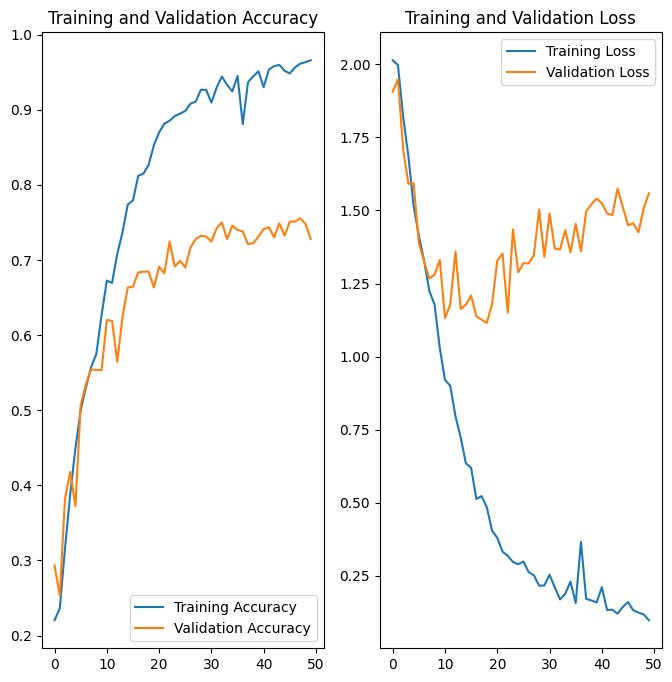

In [60]:
#Visualize
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1.   Accuracy has improved a lot
2.   Still, the model overfits
